<a href="https://colab.research.google.com/github/Shreeja7Sheth/XGBoost/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Customer.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# EDA

In [ ]:
df.shape


(440, 8)

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Check missing values

In [ ]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


#Declare feature vector and target variable

In [ ]:
X=df.drop('Channel',axis=1)
y=df['Channel']

Looking at the feature vector (X) and target variable (y)

In [ ]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [ ]:
y.head()

,Channel
0,2
1,2
2,2
3,1
4,2


In [ ]:
y[y==2] = 0
y[y==1] = 1

In [ ]:
y.head()

,Channel
0,0
1,0
2,0
3,1
4,0


Now, I will convert the dataset into an optimized data structure called Dmatrix
that XGBoost supports and gives it acclaimed performance and efficiency
gains. I will do it as follows.

In [ ]:
data_matrix = xgb.DMatrix(data=X, label=y)

#Split data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }





In [ ]:

# instantiate the classifier
xgb_clf = XGBClassifier(**params)





In [ ]:
!pip install scikit-learn==1.3.1

In [ ]:
# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


#Make predictions with XGBoost Classifier

In [ ]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [ ]:
# check accuracy score
from sklearn.metrics import accuracy_score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


XGBoost model accuracy score: 0.8788


#k-fold Cross Validation using XGBoost

To build more robust models with XGBoost, we must do k-fold cross validation. In this way, we ensure that the
original training dataset is used for both training and validation. Also, each entry is used for validation just once.
XGBoost supports k-fold cross validation using the cv() method. In this method, we will specify several parameters
which are as follows:- nfolds - This parameter specifies the number of cross-validation sets we want to build.
num_boost_round - It denotes the number of trees we build. metrics - It is the performance evaluation metrics to be
considered during CV. as_pandas - It is used to return the results in a pandas DataFrame. early_stopping_rounds -
This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.
seed - This parameter is used for reproducibility of results. We can use these parameters to build a k-fold crossvalidation model by calling XGBoost's CV() method.

In [ ]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_matrix, params=params, nfold=3,num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)


In [ ]:
xgb_cv.head()


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.916130,0.017352,0.883424,0.031286
1,0.916677,0.017711,0.884176,0.031818
2,0.942047,0.010679,0.921339,0.004898
3,0.959857,0.004367,0.947506,0.010233
4,0.963008,0.002962,0.944536,0.010897


#Feature importance with XGBoost

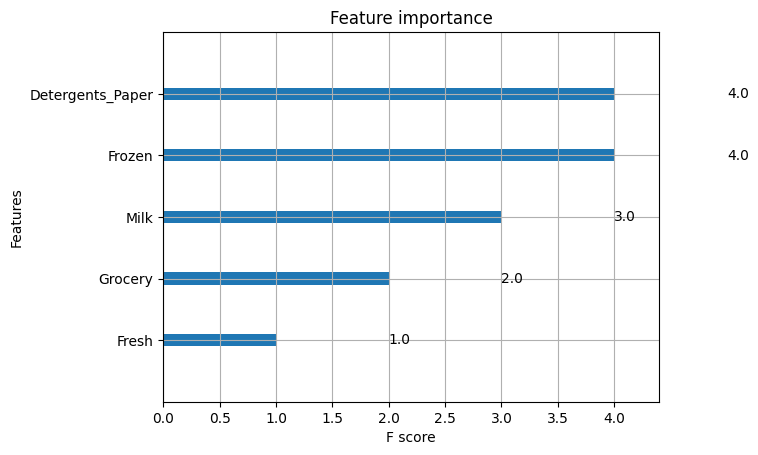

In [ ]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]

In [ ]:
plt.show()

1.In this project, I implement XGBoost with Python and Scikit-Learn to classify the customers from two different
channels as Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers.
2.The y labels contain
values as 1 and 2. I have converted them into 0 and 1 for further analysis.
3.I have trained the XGBoost classifier and
found the accuracy score to be 91.67%.
4.I have done the hyperparameter tuning in XGBoost by doing k-fold crossvalidation.
5.I find the most important feature in XGBoost to be Grocey. I did it using the plot_importance() function
in XGBoost that helps us to achieve this task.